In [1]:

%pylab inline
import warnings
warnings.filterwarnings("ignore")
#import pickle
from SCCAF import *
import pandas as pd
# from plotnine import *

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
pwd

'/home/feng_shuo/deconvolution/figure1/extended_figure1'

In [3]:
df=pd.read_csv('./dwls_add//extended_figure1_all-2024-8-28.csv',index_col=0)

In [4]:
df

,RMSE,Pearson,name,study,Methods
1,0.1146,-0.0018,t.p.Aizarani2019.10000.F.T.2.none.bulk.TMM.all...,Aizarani2019,CDSeq
2,0.0316,0.9594,t.p.Aizarani2019.10000.F.T.2.none.bulk.TMM.all...,Aizarani2019,CIBERSORT
3,0.1617,0.2130,t.p.Aizarani2019.10000.F.T.2.none.bulk.TMM.all...,Aizarani2019,DCQ
4,0.0952,0.5522,t.p.Aizarani2019.10000.F.T.2.none.bulk.TMM.all...,Aizarani2019,deconf
5,0.0674,0.8014,t.p.Aizarani2019.10000.F.T.2.none.bulk.TMM.all...,Aizarani2019,DeconRNASeq
...,...,...,...,...,...
1069,0.0138,0.9849,t.p.ZilionisMouse2019fine.10000.F.T.2.none.sc....,ZilionisMouse2019fine,MuSiC
1070,0.0346,0.8840,t.p.ZilionisMouse2019fine.10000.F.T.2.none.sc....,ZilionisMouse2019fine,SCDC
1071,3.4500,0.1843,t.p.ZilionisMouse2019fine.10000.F.T.2.none.sc....,ZilionisMouse2019fine,TIMER
1072,0.0074,0.9064,p.Tasic2016.10000.F.T.2_DWLS_benchmark_cross.rds,Tasic2016,DWLS


In [5]:
len(df['Methods'].value_counts().index)

25

In [6]:
df['Methods']=df['Methods'].astype('category')

In [7]:
df['1/RMSE']=1/df['RMSE']

In [8]:
df['Methods']=df['Methods'].cat.reorder_categories(['DWLS','FARDEEP', 'MuSiC','nnls','RLR','EpiDISH',\
                                                   'OLS', 'EPIC',   \
                                                  'elasticNet', 'lasso','proportionsInAdmixture','ridge',\
                                                  'CIBERSORT','SCDC','BisqueRNA', 'CDSeq',  'CPM', 'DCQ', 'DSA', 'DeconRNASeq',
        'TIMER',
       'deconf', 'dtangle',  'ssFrobenius', 'ssKL'])

In [9]:
df['Pearson'] = df['Pearson'].astype(float)

In [10]:
df

,RMSE,Pearson,name,study,Methods,1/RMSE
1,0.1146,-0.0018,t.p.Aizarani2019.10000.F.T.2.none.bulk.TMM.all...,Aizarani2019,CDSeq,8.726003
2,0.0316,0.9594,t.p.Aizarani2019.10000.F.T.2.none.bulk.TMM.all...,Aizarani2019,CIBERSORT,31.645570
3,0.1617,0.2130,t.p.Aizarani2019.10000.F.T.2.none.bulk.TMM.all...,Aizarani2019,DCQ,6.184292
4,0.0952,0.5522,t.p.Aizarani2019.10000.F.T.2.none.bulk.TMM.all...,Aizarani2019,deconf,10.504202
5,0.0674,0.8014,t.p.Aizarani2019.10000.F.T.2.none.bulk.TMM.all...,Aizarani2019,DeconRNASeq,14.836795
...,...,...,...,...,...,...
1069,0.0138,0.9849,t.p.ZilionisMouse2019fine.10000.F.T.2.none.sc....,ZilionisMouse2019fine,MuSiC,72.463768
1070,0.0346,0.8840,t.p.ZilionisMouse2019fine.10000.F.T.2.none.sc....,ZilionisMouse2019fine,SCDC,28.901734
1071,3.4500,0.1843,t.p.ZilionisMouse2019fine.10000.F.T.2.none.sc....,ZilionisMouse2019fine,TIMER,0.289855
1072,0.0074,0.9064,p.Tasic2016.10000.F.T.2_DWLS_benchmark_cross.rds,Tasic2016,DWLS,135.135135


In [11]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

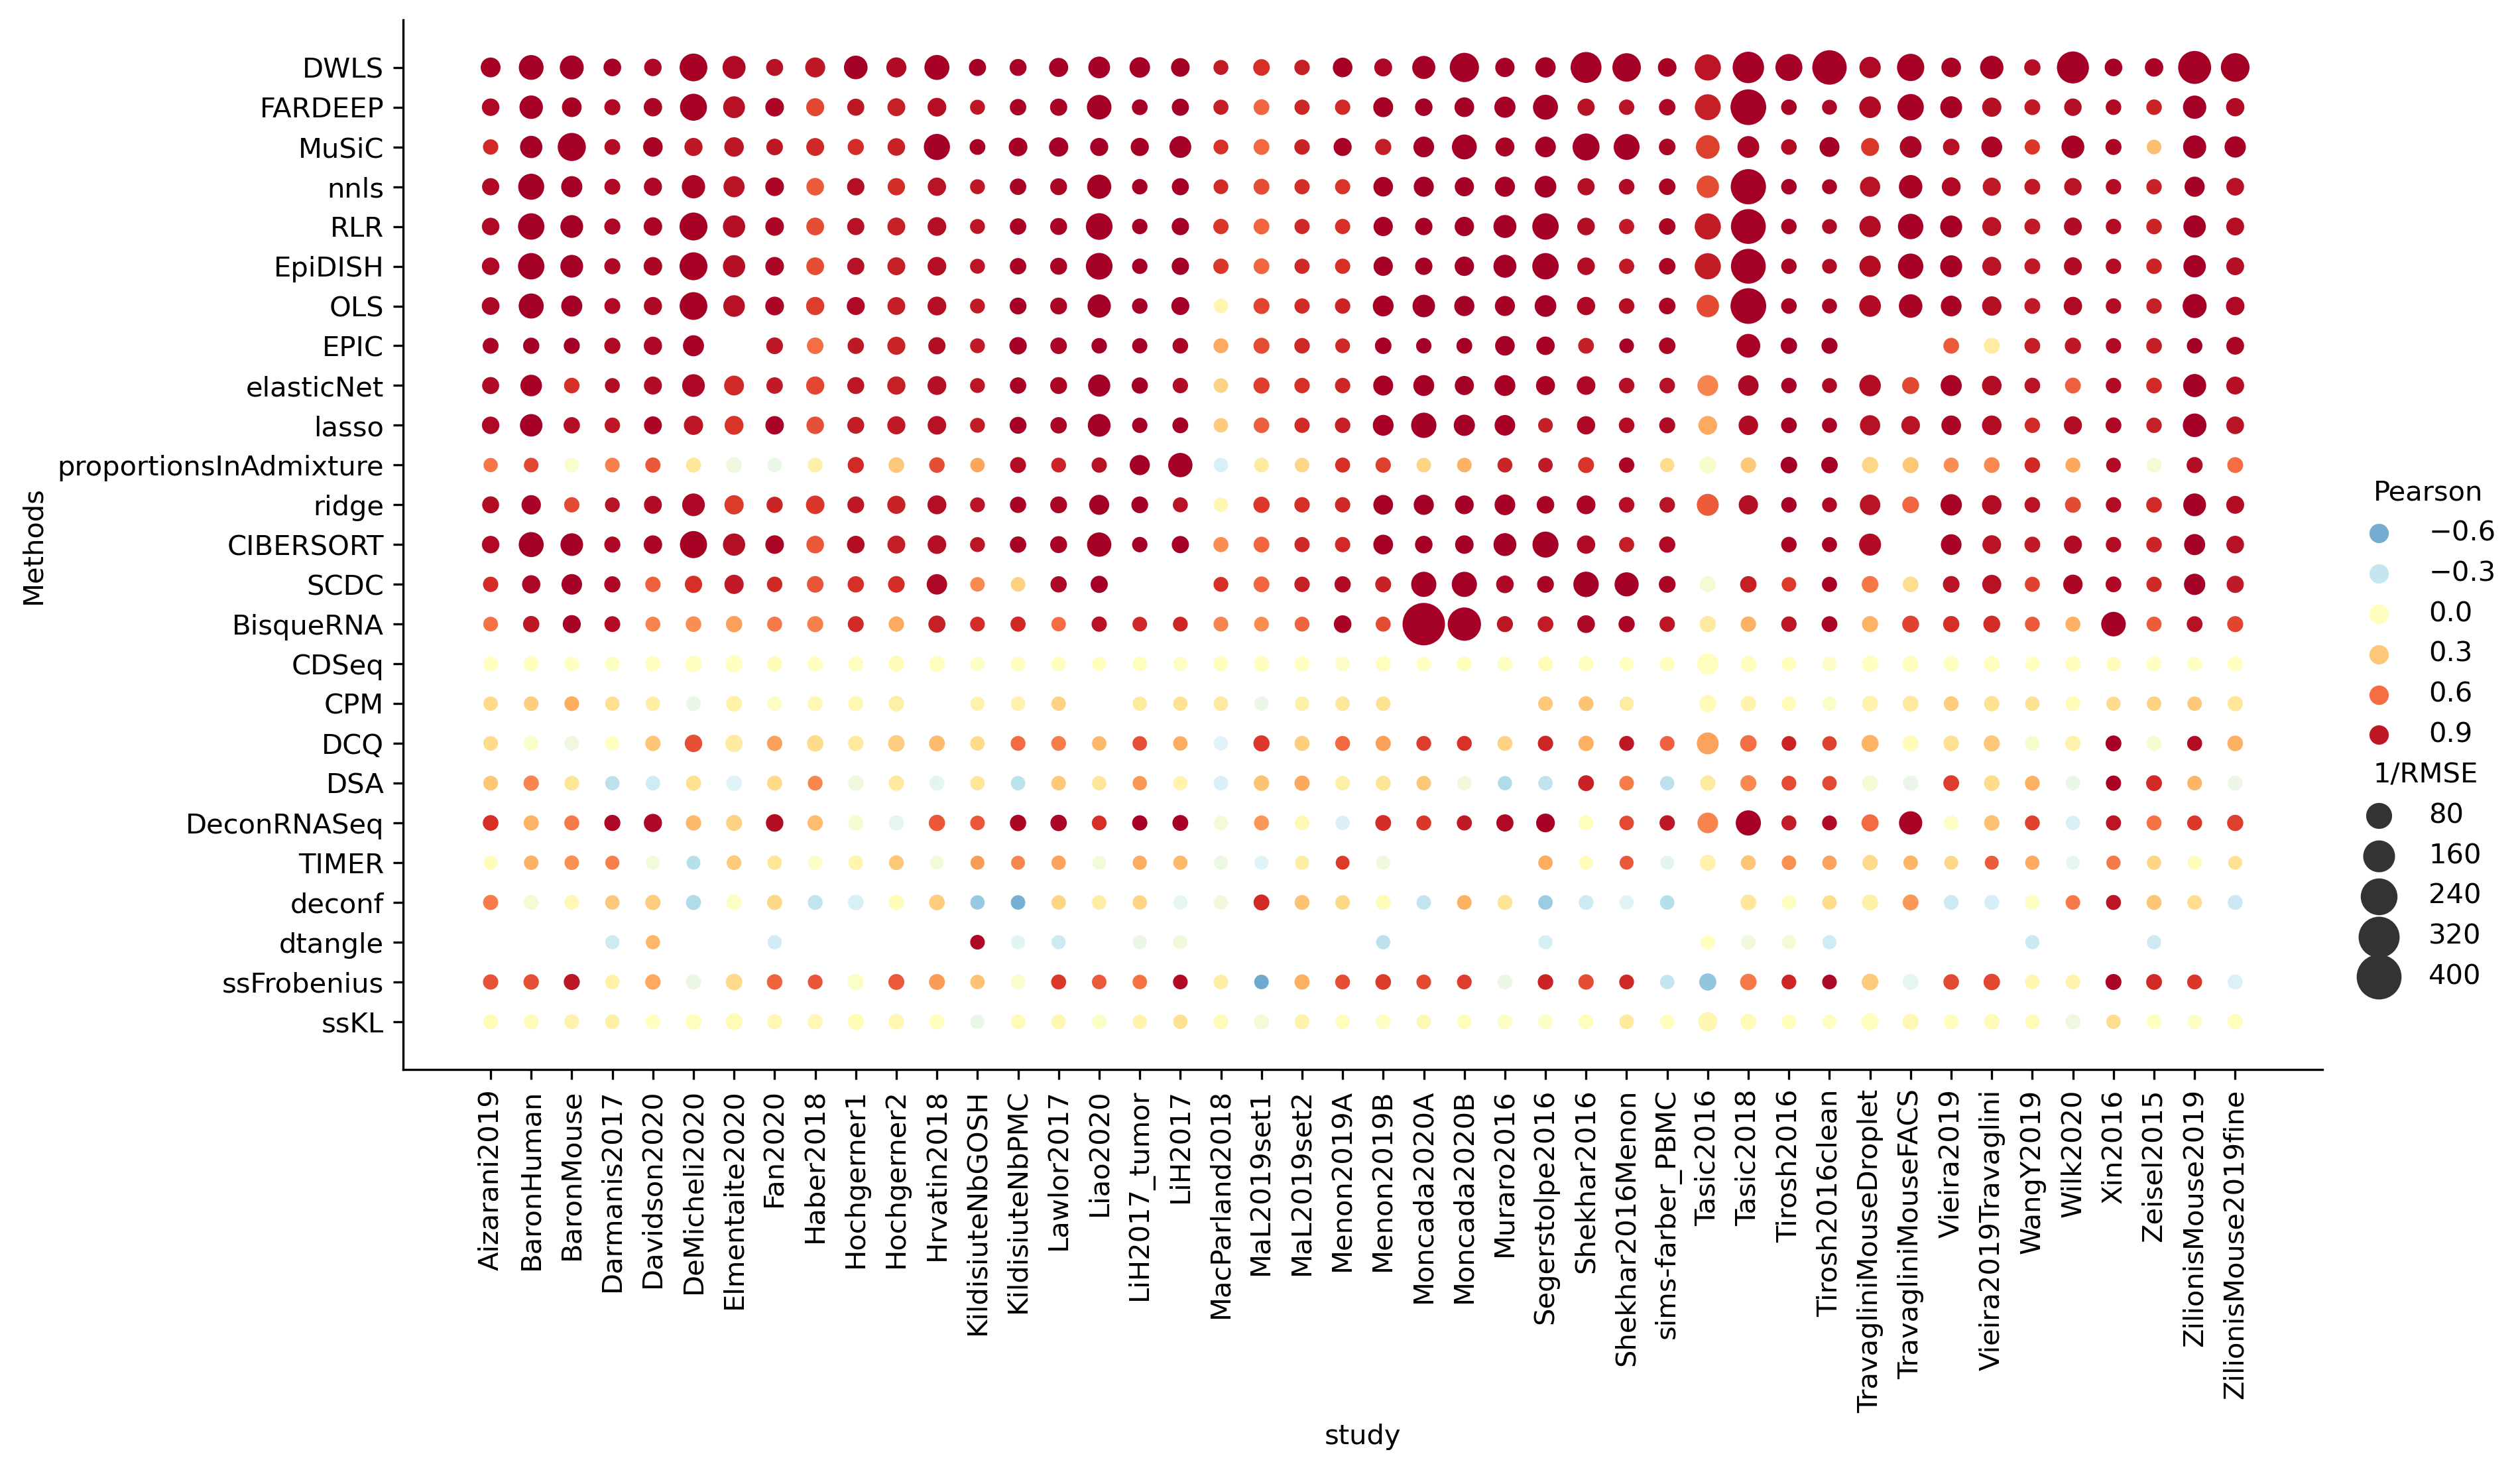

In [12]:
ax = sns.relplot(data = df, x = 'study', y='Methods', size = '1/RMSE', hue='Pearson', hue_norm=(-1, 1),\
            height=6, aspect=2, sizes=(30, 250), palette='RdYlBu_r')
ax.set_xticklabels(rotation=90)
# plt.savefig('./figures/extended_figure1_new.pdf',bbox_inches = 'tight')